<a href="https://colab.research.google.com/github/b-whitman/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-introduction-to-bayesian-inference/Ben_Whitman_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## 1) Using a function to apply Bayes

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk*prob_drunk_prior) / prob_positive

In [2]:
# Example from lecture
prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [3]:
# What if test gives half as many false positives?
prob_drunk_given_positive(0.001, 0.04, 1)
# Looks like that just doubles the rate, to 2.5%

0.025

In [13]:
# What if test gives 1% false positives?
prob_drunk_given_positive(0.001, 0.01, 1)
# Raises probability of true positive to 10%

0.1

In [16]:
# To use another example from lecture, what if we conduct the test twice in a row?
# 0.08 * 0.08 = 0.0064
prob_drunk_given_positive(0.001, 0.0064, 1)
# Am I doing this right? Does it really only raise the probability to ~16%?
# Or am I failing to tease out something in the structure of Bayes' Theorem?

0.15625

In [18]:
# Okay, what if we use the previous posterior as our new prior? (per the drug testing example)
prob_drunk_given_positive(0.0125, 0.08, 1)
# So that's pretty interesting- exactly the same result as just multiplying
# the probability of a positive...
# I still suspect I'm missing something. Shouldn't the math for rate of all positives
# change given the new prior?

0.15625

In [22]:
# This gives a slightly different answer but I feel more confident about the math
two_tests = prob_drunk_given_positive(0.0125, (1*0.0125+0.08*0.9875), 1)
two_tests

0.1366120218579235

In [24]:
# Three tests...
three_tests = prob_drunk_given_positive(two_tests, (1*two_tests+0.08*(1-two_tests)), 1)
three_tests

0.6641870350690755

In [26]:
# Four tests???
four_tests = prob_drunk_given_positive(three_tests, (1*three_tests+0.08*(1-three_tests)), 1)
four_tests

0.9611244387033278

In [28]:
# Five tests...?!
five_tests = prob_drunk_given_positive(four_tests, (1*four_tests+0.08*(1-four_tests)), 1)
five_tests

0.9967745968884046

In [29]:
# Have we hit a limit?
six_tests = prob_drunk_given_positive(five_tests, (1*five_tests+0.08*(1-five_tests)), 1)
six_tests

0.9997411997948845

In [0]:
# This function applies Bayes Theorem num_iter times to the breathalyzer problem
def prob_drunk_iter(prior, prob_positive, prob_positive_drunk, num_iter):
  posterior_list = []
  for i in range(num_iter):
    posterior = (prob_positive_drunk*prior) / prob_positive
    prior = posterior
    prob_positive = (1*prior+0.08*(1-prior))
    posterior_list.append(posterior)
  return posterior_list

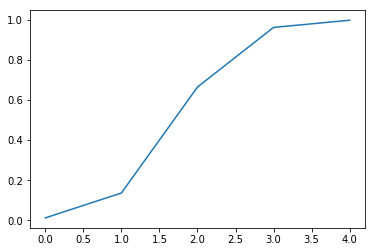

In [41]:
prob_drunk_five = prob_drunk_iter(0.001, 0.08, 1, 5)
plt.plot(prob_drunk_five)

In [35]:
prob_drunk_list = prob_drunk_iter(0.001, 0.08, 1, 10)
prob_drunk_list

[0.0125,
 0.1366120218579235,
 0.6641870350690755,
 0.9611244387033278,
 0.9967745968884046,
 0.9997411997948845,
 0.9999792910528694,
 0.9999983432526648,
 0.9999998674600111,
 0.9999999893967996]

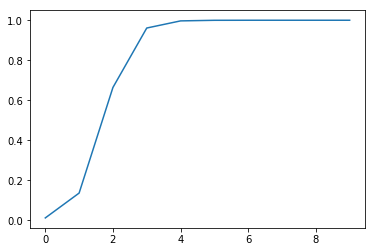

In [36]:
import matplotlib.pyplot as plt
# Plot for 10 repetitions of test
plt.plot(prob_drunk_list)

In [38]:
prob_drunk_twenty = prob_drunk_iter(0.001, 0.08, 1, 20)
prob_drunk_twenty

[0.0125,
 0.1366120218579235,
 0.6641870350690755,
 0.9611244387033278,
 0.9967745968884046,
 0.9997411997948845,
 0.9999792910528694,
 0.9999983432526648,
 0.9999998674600111,
 0.9999999893967996,
 0.999999999151744,
 0.9999999999321395,
 0.9999999999945711,
 0.9999999999995657,
 0.9999999999999653,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

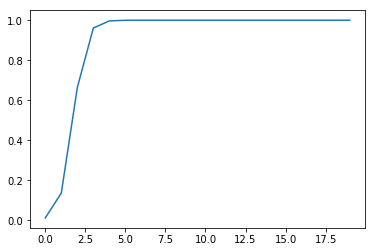

In [39]:
plt.plot(prob_drunk_twenty)
# Plot for 20 reps
# Seems to hit a limit around 5 reps

In [0]:
import scipy.stats as stats
stats.bayes_mvs?

## 2) Scipy.Stats.bayes_mvs

In [44]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 03:57:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-09 03:57:22 (628 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np

In [49]:
df_cols = ['party',
           'handicapped_infants',
           'water-project-cost-sharing',
           'adoption-of-the-budget-resolution',
           'physician-fee-freeze',
           'el-salvador-aid',
           'religious-groups-in-schools',
           'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras',
           'mx-missile',
           'immigration',
           'synfuels-corporation-cutback',
           'education-spending',
           'superfund-right-to-sue',
           'crime',
           'duty-free-exports',
           'export-administration-act-south-africa']
df = pd.read_csv('house-votes-84.data', names=df_cols)
replace_dict = {'?': np.nan, 'y': 1, 'n': 0}
df = df.replace(replace_dict)
df.head()

,party,handicapped_infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [52]:
mean, var, std = stats.bayes_mvs(df['water-project-cost-sharing'].dropna())
mean

Mean(statistic=0.5038759689922481, minmax=(0.4619161006559928, 0.5458358373285033))

In [53]:
var

Variance(statistic=0.25193798449612403, minmax=(0.22352548228908597, 0.2833227081716581))

In [54]:
std

Std_dev(statistic=0.5016075698129333, minmax=(0.4727848160517489, 0.5322806667272991))

In [0]:
# I'm not sure if I've done this part correctly, and if I have I don't think I
# understand it...

## 3) Comparing Bayesian approach to standard approach

## 4) Bayesian and Frequentist Statistics

The difference between Bayesian and Frequentist statistics lies in how they conceive of probability.

Frequentist stats conceives of probability as a rate of occurrence.

Bayesian stats conceives of probability as a degree of belief in an event.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)